<a href="https://colab.research.google.com/github/juan-manuel124/ProyectoAnalisisDatos-TECH/blob/main/Proyecto_EnergiaSolarRisaraldaTech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://repositoriobi.minenergia.gov.co/handle/123456789/2679

https://www.datos.gov.co/d/vy9n-w6hc

#**Repositorio de GitHub**
https://github.com/juan-manuel124/ProyectoAnalisisDatos-TECH.git


In [36]:
# =====================================
# 📦 Importación de librerías necesarias
# =====================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
import requests
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# =====================================
# 🌐 Fuente 1: GitHub (CSV en tu repositorio público)
# =====================================
print("🔽 Cargando datos desde datos.gov.co...")
url_datosgov = "https://www.datos.gov.co/api/views/vy9n-w6hc/rows.csv?accessType=DOWNLOAD"
# Corrected URL to raw data on GitHub
url_daraNasa = "https://raw.githubusercontent.com/juan-manuel124/ProyectoAnalisisDatos-TECH/main/POWER_Point_Daily_20221001_20250612_005d07N_075d96W_LST.csv"

# =====================================
# 📊 Función para mejorar la vista previa de los DataFrames
# =====================================
def vista_previa(df, nombre, num_filas=5):
    print(f"\n{'='*80}")
    print(f"📌 Vista previa de: {nombre}")
    print(f"🔸 Dimensiones: {df.shape[0]} filas × {df.shape[1]} columnas")
    print('-'*80)
    display(df.head(num_filas))
    print('='*80)

# =====================================
# 🔽 Carga de datos
# =====================================
try:
    response = requests.get(url_datosgov)
    response.raise_for_status()

    data_dgov = pd.read_csv(StringIO(response.text), encoding='utf-8', on_bad_lines='skip')

    print("🔽 Cargando datos desde NASA...")
    response2 = requests.get(url_daraNasa)
    response2.raise_for_status()

    # Saltar cabecera personalizada del archivo NASA
    data_nasa = pd.read_csv(StringIO(response2.text), encoding='utf-8', skiprows=12)
    # Selección de columnas relevantes
    datos_uv_temp = data_nasa[['YEAR', 'MO', 'DY', 'ALLSKY_SFC_UV_INDEX', 'CDD18_3']]

    # Definir umbrales para destacar
    umbral_uv = 5      # Por ejemplo, UV > 5 considerado alto
    umbral_temp = 10   # Por ejemplo, CDD18_3 > 10 indica días cálidos

    # Filtrar días con radiación UV alta o temperatura elevada
    datos_destacados = datos_uv_temp[(datos_uv_temp['ALLSKY_SFC_UV_INDEX'] > umbral_uv) | (datos_uv_temp['CDD18_3'] > umbral_temp)]

    print("✅ Datos cargados exitosamente")

except Exception as e:
    print(f"❌ Error al cargar datos: {e}")

# =====================================
# 👁️ Vista previa mejorada
# =====================================
try:
    vista_previa(data_dgov, "Proyectos Energéticos - datos.gov.co")
    vista_previa(data_nasa, "Datos Meteorológicos - NASA POWER")
    # Mostrar los resultados
    print("📌 Días con alta radiación UV o temperaturas elevadas:")
    columnas_radiacion = ['YEAR', 'MO', 'DY', 'ALLSKY_SFC_SW_DWN', 'ALLSKY_SFC_SW_DIFF']
    vista_previa(data_nasa[columnas_radiacion], "📌 Radiación Solar (NASA POWER)")

    radiacion_alta = data_nasa[data_nasa['ALLSKY_SFC_SW_DWN'] > 250]
    vista_previa(radiacion_alta, "🌞 Días con Alta Radiación Solar (>250 W/m²)")
    print("✅ Datos cargados y visualizados correctamente")

except Exception as e:
    print(f"⚠️ Error al mostrar la vista previa: {e}")

🔽 Cargando datos desde datos.gov.co...
🔽 Cargando datos desde NASA...
✅ Datos cargados exitosamente

📌 Vista previa de: Proyectos Energéticos - datos.gov.co
🔸 Dimensiones: 158 filas × 13 columnas
--------------------------------------------------------------------------------


,Proyecto,Tipo,Capacidad,Departamento,Municipio,Código Departamento,Código Municipio,Fecha estimada FPO,Energía [kWh/día],Usuarios,Inversión estimada [COP],Empleos estimados,Emisiones CO2 [Ton/año]
0,JEPIRACHI,Eólico,18.42,LA GUAJIRA,URIBIA,44,44847,2004-04-27T00:00:00.000,176832,30665,79206000000,51,51635
1,AUTOG CELSIA SOLAR YUMBO,Solar,9.80,VALLE DEL CAUCA,YUMBO,76,76892,2017-03-09T00:00:00.000,47040,8157,42140000000,68,13736
2,CELSIA SOLAR BOLIVAR,Solar,8.06,BOLÍVAR,SANTA ROSA,13,13683,2019-02-01T00:00:00.000,38688,6709,34658000000,56,11297
3,EL PASO SOLAR (ENEL GREEN POWER),Solar,67.00,CESAR,EL PASO,20,20250,2019-04-05T00:00:00.000,321600,55769,288100000000,466,93907
4,SOLAR CASTILLA ECP,Solar,20.00,META,CASTILLA LA NUEVA,50,50150,2019-10-10T00:00:00.000,96000,16647,86000000000,139,28032



📌 Vista previa de: Datos Meteorológicos - NASA POWER
🔸 Dimensiones: 986 filas × 7 columnas
--------------------------------------------------------------------------------


,YEAR,MO,DY,ALLSKY_SFC_UV_INDEX,ALLSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DIFF,CDD18_3
0,2022,10,1,1.65,153.32,110.89,2.75
1,2022,10,2,2.50,251.59,107.63,4.74
2,2022,10,3,3.06,269.56,91.18,4.51
3,2022,10,4,2.65,199.47,140.00,2.83
4,2022,10,5,2.81,198.99,127.51,2.63


📌 Días con alta radiación UV o temperaturas elevadas:

📌 Vista previa de: 📌 Radiación Solar (NASA POWER)
🔸 Dimensiones: 986 filas × 5 columnas
--------------------------------------------------------------------------------


,YEAR,MO,DY,ALLSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DIFF
0,2022,10,1,153.32,110.89
1,2022,10,2,251.59,107.63
2,2022,10,3,269.56,91.18
3,2022,10,4,199.47,140.00
4,2022,10,5,198.99,127.51



📌 Vista previa de: 🌞 Días con Alta Radiación Solar (>250 W/m²)
🔸 Dimensiones: 127 filas × 7 columnas
--------------------------------------------------------------------------------


,YEAR,MO,DY,ALLSKY_SFC_UV_INDEX,ALLSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DIFF,CDD18_3
1,2022,10,2,2.50,251.59,107.63,4.74
2,2022,10,3,3.06,269.56,91.18,4.51
9,2022,10,10,3.09,260.98,97.57,2.66
116,2023,1,25,3.26,251.24,87.85,3.80
117,2023,1,26,3.39,261.92,85.47,4.02


✅ Datos cargados y visualizados correctamente


In [53]:

# Use the data_nasa DataFrame loaded in the previous cell
DataEnergyNasa = data_nasa

# Verificación de la estructura de los datos
print(DataEnergyNasa.head())
print(DataEnergyNasa.info())

# Manejo de Valores Faltantes:
# Replace -999 with NaN as per the data description
DataEnergyNasa.replace(-999, pd.NA, inplace=True)
# Eliminar filas con valores faltantes si es conveniente
DataEnergyNasa.dropna(inplace=True)


# Normalización de Fechas:
# Create 'fecha' column from 'YEAR', 'MO', 'DY'
DataEnergyNasa['fecha'] = pd.to_datetime(DataEnergyNasa[['YEAR', 'MO', 'DY']].astype(str).agg('-'.join, axis=1), errors='coerce')

# Drop rows where date conversion failed
DataEnergyNasa.dropna(subset=['fecha'], inplace=True)

# Create a new column with the date in numerical format (e.g., seconds since epoch)
DataEnergyNasa['fecha_num'] = DataEnergyNasa['fecha'].apply(lambda x: x.timestamp())

# Estadísticas descriptivas
print(DataEnergyNasa.describe())

   YEAR  MO  DY  ALLSKY_SFC_UV_INDEX  ALLSKY_SFC_SW_DWN  ALLSKY_SFC_SW_DIFF  \
0  2022  10   1                 1.65             153.32              110.89   
1  2022  10   2                 2.50             251.59              107.63   
2  2022  10   3                 3.06             269.56               91.18   
3  2022  10   4                 2.65             199.47              140.00   
4  2022  10   5                 2.81             198.99              127.51   

   CDD18_3      fecha        fecha_num  
0     2.75 2022-10-01 1,664,582,400.00  
1     4.74 2022-10-02 1,664,668,800.00  
2     4.51 2022-10-03 1,664,755,200.00  
3     2.83 2022-10-04 1,664,841,600.00  
4     2.63 2022-10-05 1,664,928,000.00  
<class 'pandas.core.frame.DataFrame'>
Index: 669 entries, 0 to 668
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   YEAR                 669 non-null    int64         
 1   MO  

In [57]:
# =====================================
# 🧹 Limpieza y Conversión
# =====================================
DataEnergyNasa = data_nasa.copy()

# Convertir columnas numéricas correctamente (por si alguna vino como texto)
columnas_numericas = ['ALLSKY_SFC_UV_INDEX', 'ALLSKY_SFC_SW_DWN', 'ALLSKY_SFC_SW_DIFF', 'CDD18_3']
for col in columnas_numericas:
    DataEnergyNasa[col] = pd.to_numeric(DataEnergyNasa[col], errors='coerce')

# Reemplazar -999 con NaN
DataEnergyNasa.replace(-999, np.nan, inplace=True)

# Asegurar que YEAR, MO, DY no tengan valores nulos
DataEnergyNasa = DataEnergyNasa.dropna(subset=['YEAR', 'MO', 'DY'])

# Convertir columnas YEAR, MO, DY a enteros para evitar problemas con to_datetime()
DataEnergyNasa[['YEAR', 'MO', 'DY']] = DataEnergyNasa[['YEAR', 'MO', 'DY']].astype(int)

# Normalización de fechas
DataEnergyNasa['fecha'] = pd.to_datetime(DataEnergyNasa[['YEAR', 'MO', 'DY']].astype(str).agg('-'.join, axis=1), errors='coerce')

# Eliminar filas donde la fecha no pudo convertirse
DataEnergyNasa.dropna(subset=['fecha'], inplace=True)

# Crear columna con fecha en formato numérico (timestamp)
DataEnergyNasa['fecha_num'] = DataEnergyNasa['fecha'].apply(lambda x: x.timestamp())

# =====================================
# 📊 Estadísticas descriptivas enfocadas en Energía y Temperatura
# =====================================
print("\n📊 Estadísticas descriptivas - Radiación Solar (Energía):")
print(DataEnergyNasa[['ALLSKY_SFC_SW_DWN', 'ALLSKY_SFC_SW_DIFF']].describe())

print("\n🌡️ Estadísticas descriptivas - Temperatura (Grados día >18.3°C):")
print(DataEnergyNasa[['CDD18_3']].describe())

# =====================================
# 🌞 Filtrar días con alta radiación solar (> 250 W/m²)
# =====================================
umbral_radiacion = 250
AltaRadiacion = DataEnergyNasa[DataEnergyNasa['ALLSKY_SFC_SW_DWN'] > umbral_radiacion]
print(f"\n📌 Días con alta radiación solar (> {umbral_radiacion} W/m²): {AltaRadiacion.shape[0]} días")
print(AltaRadiacion[['fecha', 'ALLSKY_SFC_SW_DWN', 'ALLSKY_SFC_SW_DIFF', 'CDD18_3']].head())




📊 Estadísticas descriptivas - Radiación Solar (Energía):
       ALLSKY_SFC_SW_DWN  ALLSKY_SFC_SW_DIFF
count             669.00              669.00
mean              204.35              100.39
std                40.01               15.16
min                81.73               56.75
25%               178.18               90.30
50%               204.88               98.30
75%               233.58              108.47
max               299.41              151.65

🌡️ Estadísticas descriptivas - Temperatura (Grados día >18.3°C):
       CDD18_3
count   669.00
mean      4.42
std       1.26
min       1.07
25%       3.52
50%       4.50
75%       5.35
max       7.30

📌 Días con alta radiación solar (> 250 W/m²): 88 días
         fecha  ALLSKY_SFC_SW_DWN  ALLSKY_SFC_SW_DIFF  CDD18_3
1   2022-10-02             251.59              107.63     4.74
2   2022-10-03             269.56               91.18     4.51
9   2022-10-10             260.98               97.57     2.66
116 2023-01-25             25

In [18]:
# 2. Exploración inicial
# =====================================
# 🔍 EXPLORACIÓN INICIAL AVANZADA
# Documentacion para darle forma al codigo se encuentra en la libreriras de python
# https://docs.python.org/3/reference/lexical_analysis.html#f-strings
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html
# =====================================

def exploracion_mejorada(df, nombre_fuente="Dataset"):
    """
    Realiza una exploración avanzada de un DataFrame con análisis estadísticos
    y visualizaciones clave para proyectos energéticos.

    Args:
        df (pd.DataFrame): DataFrame a analizar
        nombre_fuente (str): Nombre descriptivo de la fuente de datos
    """
    # Configuración inicial
    pd.set_option('display.float_format', '{:,.2f}'.format)
    print(f"\n{'='*80}\n🔍 EXPLORACIÓN AVANZADA: {nombre_fuente.upper()}\n{'='*80}")#otiene la fuente (tipo letra )

    # 1. Metadatos básicos
    # Imprime información básica sobre el DataFrame:
    # - Número total de filas (observaciones o registros)
    # - Número total de columnas (atributos o variables)
    print(f"\n📌 METADATOS [Filas: {df.shape[0]} | Columnas: {df.shape[1]}]")
    print(f"📊 Memoria usada: {df.memory_usage(deep=True).sum()/1024**2:.2f} MB") #muestra el uso de memoria para detectar posibles desbordamientos

    # 2. Tipos de datos y completitud
    # Este bloque de código analiza los tipos de datos de cada columna,
    # cuenta los valores no nulos, calcula el porcentaje de completitud
    # y determina la cantidad de valores únicos por columna.

    # Se crea un nuevo DataFrame llamado 'tipos_df'.
    # Este DataFrame contendrá el resumen del análisis de los datos.
    tipos_df = pd.DataFrame({
        # 'Tipo': Se crea una columna en 'tipos_df' llamada 'Tipo'.
        # df.dtypes: Esto obtiene el tipo de dato de cada columna en el DataFrame original 'df'.
        'Tipo': df.dtypes,

        # 'No Nulos': Se crea una columna en 'tipos_df' llamada 'No Nulos'.
        # df.count(): Esto cuenta el número de valores no nulos (no NaN) en cada columna de 'df'.
        'No Nulos': df.count(),

        # '% Completitud': Se crea una columna para mostrar el porcentaje de valores no nulos.
        # df.count() / len(df): Calcula la proporción de valores no nulos dividiendo
        #                      el conteo de no nulos por el número total de filas (len(df)).
        # * 100: Multiplica la proporción por 100 para obtener un porcentaje.
        # .round(2): Redondea el porcentaje a 2 decimales.
        '% Completitud': (df.count() / len(df) * 100).round(2),

        # 'Valores Únicos': Se crea una columna para mostrar la cantidad de valores únicos.
        # df.nunique(): Esto cuenta el número de valores únicos en cada columna de 'df'.
        'Valores Únicos': df.nunique()
    })

    # Después de ejecutar este código, 'tipos_df' será un DataFrame
    # donde cada fila representa una columna del DataFrame original 'df',
    # y las columnas de 'tipos_df' ('Tipo', 'No Nulos', '% Completitud', 'Valores Únicos')
    # contendrán la información resumida para cada columna original.

    print("\n🧾 RESUMEN DE VARIABLES:")
    display(tipos_df)

    # 3. Análisis de variables numéricas
    # Selecciona solo las columnas numéricas del DataFrame
    num_cols = df.select_dtypes(include=np.number).columns

    # Si hay al menos una columna numérica
    if len(num_cols) > 0:
        print("\n🔢 ESTADÍSTICAS NUMÉRICAS:")

        # Muestra estadísticas descriptivas detalladas (incluye percentiles extremos)
        display(df[num_cols].describe(percentiles=[.01, .25, .5, .75, .99]).transpose())

        # --- Detección de valores atípicos (outliers) usando el criterio IQR ---

        # Calcula el primer cuartil (Q1) para cada variable numérica
        Q1 = df[num_cols].quantile(0.25)

        # Calcula el tercer cuartil (Q3) para cada variable numérica
        Q3 = df[num_cols].quantile(0.75)

        # Calcula el rango intercuartílico (IQR)
        IQR = Q3 - Q1

        # Identifica cuántos valores están fuera del rango normal:
        #   - Menores a Q1 - 1.5 * IQR (posibles valores muy bajos)
        #   - Mayores a Q3 + 1.5 * IQR (posibles valores muy altos)
        outliers = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).sum()

        print("\n⚠️ POTENCIALES OUTLIERS (criterio IQR):")

        # Muestra el conteo de outliers por cada columna numérica
        display(outliers.to_frame('Conteo'))


    # 4. Análisis de variables categóricas
    cat_cols = df.select_dtypes(exclude=np.number).columns
    if len(cat_cols) > 0:
        print("\n🔤 DISTRIBUCIÓN CATEGÓRICA:")
        for col in cat_cols:
            if df[col].nunique() < 20:
                print(f"\n📊 {col}:")
                display(df[col].value_counts(normalize=True).head(10))

    # 5. Visualizaciones clave para energía


# =====================================
# 🚀 EJECUCIÓN PARA DATOS CARGADOS
# =====================================
if 'data_dgov' in locals():
    print("\n" + "="*60)
    print("📊 ANÁLISIS DATOS.GOV.CO")
    print("="*60)
    exploracion_mejorada(data_dgov, "Datos Públicos Energía")

if 'data_git' in locals():
    print("\n" + "="*60)
    print("📊 ANÁLISIS DATOS GITHUB")
    print("="*60)
    exploracion_mejorada(data_git, "Proyectos Energía GitHub")


📊 ANÁLISIS DATOS.GOV.CO

🔍 EXPLORACIÓN AVANZADA: DATOS PÚBLICOS ENERGÍA

📌 METADATOS [Filas: 158 | Columnas: 13]
📊 Memoria usada: 0.07 MB

🧾 RESUMEN DE VARIABLES:


,Tipo,No Nulos,% Completitud,Valores Únicos
Proyecto,object,158,100.00,156
Tipo,object,158,100.00,2
Capacidad,float64,158,100.00,104
Departamento,object,158,100.00,26
Municipio,object,158,100.00,79
Código Departamento,int64,158,100.00,26
Código Municipio,int64,158,100.00,81
Fecha estimada FPO,object,158,100.00,70
Energía [kWh/día],int64,158,100.00,106
Usuarios,int64,158,100.00,106



🔢 ESTADÍSTICAS NUMÉRICAS:


,count,mean,std,min,1%,25%,50%,75%,99%,max
Capacidad,158.00,37.97,78.07,0.01,0.04,2.27,9.90,20.75,258.60,700.00
Código Departamento,158.00,42.83,26.61,5.00,5.00,17.50,44.00,70.00,86.29,94.00
Código Municipio,158.00,"41,551.80","27,283.55",23.00,40.67,"13,675.50","44,847.00","68,514.75","86,541.23","94,001.00"
Energía [kWh/día],158.00,"231,296.03","507,038.54",21.00,102.72,"10,920.00","47,520.00","112,380.00","2,482,560.00","3,360,000.00"
Usuarios,158.00,"40,109.06","87,925.82",4.00,17.69,"1,893.75","8,240.00","19,487.75","430,501.85","582,659.00"
Inversión estimada [COP],158.00,"145,058,220,253.16","293,830,287,083.14","9,800,000.00","92,020,000.00","9,513,750,000.00","39,632,500,000.00","85,570,000,000.00","969,750,000,000.00","2,625,000,000,000.00"
Empleos estimados,158.00,221.61,485.17,0.00,0.00,16.00,69.00,144.25,"1,392.00","4,872.00"
Emisiones CO2 [Ton/año],158.00,"67,538.46","148,055.23",6.00,29.96,"3,189.00","13,876.00","32,814.75","724,907.52","981,120.00"



⚠️ POTENCIALES OUTLIERS (criterio IQR):


,Conteo
Capacidad,33
Código Departamento,0
Código Municipio,0
Energía [kWh/día],31
Usuarios,31
Inversión estimada [COP],31
Empleos estimados,30
Emisiones CO2 [Ton/año],31



🔤 DISTRIBUCIÓN CATEGÓRICA:

📊 Tipo:


,proportion
Tipo,
Solar,0.92
Eólico,0.08


#**INTERPRETACIÓN INICAL DE LOS DATOS PARA RISARALDA**
#** kWh_día = kWh/día = kWhdía

#*Estructura y completitud del dataset**
*- 158 proyectos energéticos registrados.*
__________________
#*Sin valores nulos, lo cual significa que puedes trabajar con el dataset**
completo sin preocuparte por limpieza básica.
_____________
#**13 variables bien definidas, abarcando tanto datos técnicos como económicos y ambientales.**

#**Energía diaria generada** $(kWh/día)$**
Promedio: $231.296 kWh_día$, pero con altísima dispersión (máximo: $3.360.000 kWh/día$).
_______
#**31 proyectos son outliers en esta métrica, lo cual puede relacionarse con proyectos industriales de gran escala.**

______________

Puedes comparar cuánta energía genera Risaralda frente a departamentos similares.

_____

Tipos de proyectos
92% son solares y solo 8% eólicos, lo que indica una fuerte tendencia a proyectos fotovoltaicos en Colombia.





🔍 ANÁLISIS ENERGÉTICO FOCALIZADO: RISARALDA
📌 Total de proyectos identificados: 8

🔌 DISTRIBUCIÓN POR TIPO DE ENERGÍA:


,% Participación
Tipo,
Solar,100.00



💰 INVERSIÓN EN RISARALDA:


,sum,mean,count
Tipo,,,
Solar,"$29,799,000,000 COP","$3,724,875,000 COP",8



⚡ CAPACIDAD DE GENERACIÓN:


,sum,mean,count
Tipo,,,
Solar,6.93 MW,0.87 MW,8



📅 EVOLUCIÓN TEMPORAL DE PROYECTOS:


,Proyectos
Año,
2020,7
2021,1


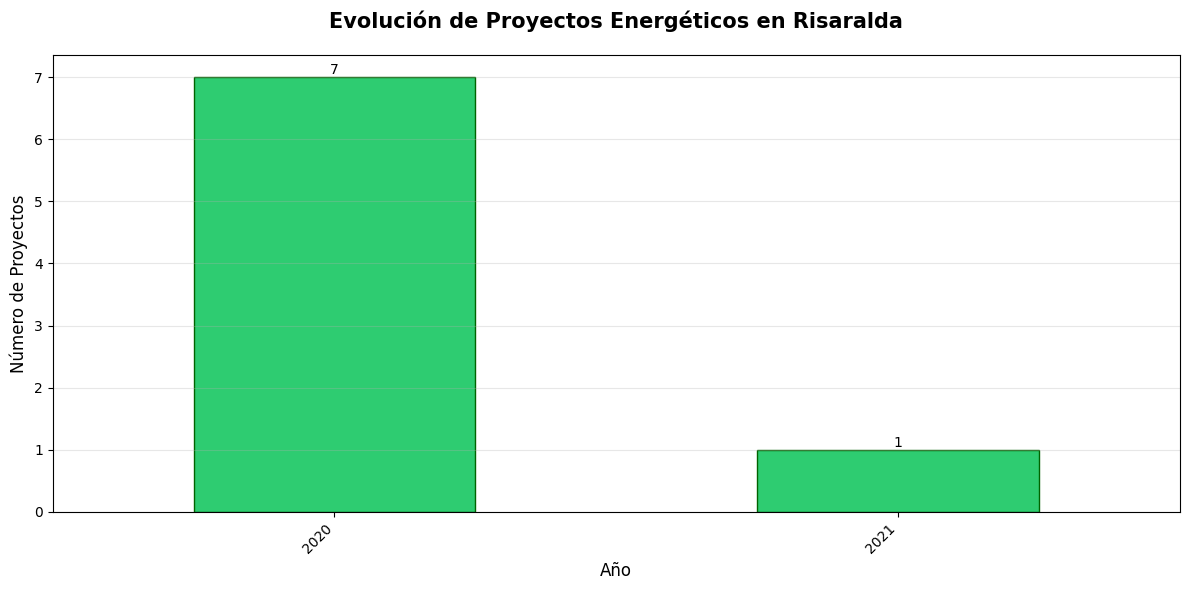


🏭 DISTRIBUCIÓN POR MUNICIPIOS:


,N° Proyectos
Municipio,
PEREIRA,8



👥 IMPACTO SOCIAL:


,Total
Empleos estimados,47.00
Usuarios,"5,768.00"
Empleos por proyecto,5.88
Usuarios por proyecto,721.00



🌱 REDUCCIÓN DE EMISIONES:
Total de emisiones evitadas: 9,712 Ton CO2/año
Equivalente a 10 hectáreas de bosque conservado


In [23]:
# =====================================
# 📌 FILTRADO PARA RISARALDA
# =====================================
def analizar_risaralda(df):
    """
    Filtra y analiza datos específicos para el departamento de Risaralda

    Args:
        df (pd.DataFrame): DataFrame con los datos energéticos nacionales
    """
    # Filtrar solo proyectos de Risaralda
    risaralda = df[df['Departamento'] == 'RISARALDA']

    if risaralda.empty:
        print("⚠️ No se encontraron proyectos registrados en Risaralda")
        return

    print(f"\n{'='*80}\n🔍 ANÁLISIS ENERGÉTICO FOCALIZADO: RISARALDA\n{'='*80}")
    print(f"📌 Total de proyectos identificados: {len(risaralda)}")

    # =====================================
    # 📊 ANÁLISIS POR TIPO DE ENERGÍA
    # =====================================
    print("\n🔌 DISTRIBUCIÓN POR TIPO DE ENERGÍA:")
    distribucion = risaralda['Tipo'].value_counts(normalize=True) * 100
    display(distribucion.to_frame('% Participación'))

    # =====================================
    # 💰 ANÁLISIS ECONÓMICO
    # =====================================
    print("\n💰 INVERSIÓN EN RISARALDA:")
    inversiones = risaralda.groupby('Tipo')['Inversión estimada [COP]'].agg(['sum', 'mean', 'count'])
    inversiones['sum'] = inversiones['sum'].apply(lambda x: f"${x:,.0f} COP")
    inversiones['mean'] = inversiones['mean'].apply(lambda x: f"${x:,.0f} COP")
    display(inversiones)

    # =====================================
    # ⚡ CAPACIDAD ENERGÉTICA
    # =====================================
    print("\n⚡ CAPACIDAD DE GENERACIÓN:")
    capacidad = risaralda.groupby('Tipo')['Capacidad'].agg(['sum', 'mean', 'count'])
    capacidad['sum'] = capacidad['sum'].apply(lambda x: f"{x:,.2f} MW")
    capacidad['mean'] = capacidad['mean'].apply(lambda x: f"{x:,.2f} MW")
    display(capacidad)

    # =====================================
    # 📅 ANÁLISIS TEMPORAL
    # =====================================
    if 'Fecha estimada FPO' in risaralda.columns:
        # Crear copia explícita para evitar el warning
        risaralda_temp = risaralda.copy()

        # Convertir fechas y extraer año
        risaralda_temp['Año'] = pd.to_datetime(risaralda_temp['Fecha estimada FPO']).dt.year

        print("\n📅 EVOLUCIÓN TEMPORAL DE PROYECTOS:")
        evolucion = risaralda_temp['Año'].value_counts().sort_index()
        display(evolucion.to_frame('Proyectos'))

        # Gráfico de evolución mejorado
        plt.figure(figsize=(12, 6))
        ax = evolucion.plot(kind='bar', color='#2ecc71', edgecolor='darkgreen')

        # Personalización del gráfico
        plt.title('Evolución de Proyectos Energéticos en Risaralda', pad=20, fontsize=15, fontweight='bold')
        plt.xlabel('Año', fontsize=12)
        plt.ylabel('Número de Proyectos', fontsize=12)
        plt.xticks(rotation=45, ha='right')

        # Añadir etiquetas de valor
        for p in ax.patches:
            ax.annotate(f"{int(p.get_height())}",
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      xytext=(0, 5),
                      textcoords='offset points',
                      fontsize=10)

        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()

    # =====================================
    # 🏭 TOP MUNICIPIOS
    # =====================================
    print("\n🏭 DISTRIBUCIÓN POR MUNICIPIOS:")
    top_municipios = risaralda['Municipio'].value_counts().head(10)
    display(top_municipios.to_frame('N° Proyectos'))

    # =====================================
    # 👥 IMPACTO SOCIAL
    # =====================================
    print("\n👥 IMPACTO SOCIAL:")
    impacto = risaralda[['Empleos estimados', 'Usuarios']].sum().to_frame('Total')
    impacto.loc['Empleos por proyecto'] = risaralda['Empleos estimados'].mean()
    impacto.loc['Usuarios por proyecto'] = risaralda['Usuarios'].mean()
    display(impacto)

    # =====================================
    # 🌱 IMPACTO AMBIENTAL
    # =====================================
    print("\n🌱 REDUCCIÓN DE EMISIONES:")
    co2 = risaralda['Emisiones CO2 [Ton/año]'].sum()
    print(f"Total de emisiones evitadas: {co2:,.0f} Ton CO2/año")
    print(f"Equivalente a {co2/1000:,.0f} hectáreas de bosque conservado")

# =====================================
# 🚀 EJECUCIÓN DEL ANÁLISIS
# =====================================
if 'data_dgov' in locals():
    analizar_risaralda(data_dgov)
elif 'data_git' in locals():
    analizar_risaralda(data_git)
else:
    print("No se encontraron datos energéticos cargados")



# 🔍 ANÁLISIS ENERGÉTICO FOCALIZADO: RISARALDA

---

## 📌 Total de proyectos identificados: **8**

---

## 🔌 Distribución por Tipo de Energía

| Tipo  | Participación (%) |
|-------|-------------------|
| Solar | **100.00**        |

Todos los proyectos energéticos registrados en Risaralda corresponden a generación solar fotovoltaica, lo que muestra una tendencia clara hacia fuentes limpias y renovables.

---

## 💰 Inversión Total en Proyectos Solares

| Total Invertido      | Promedio por Proyecto | N° Proyectos |
|----------------------|-----------------------|--------------|
| **$29,799,000,000** COP | **$3,724,875,000** COP   | 8            |

Este nivel de inversión sugiere una apuesta por proyectos de **escala media**, orientados a cobertura local o institucional.

---

## ⚡ Capacidad Instalada

| Capacidad Total (MW) | Promedio por Proyecto | N° Proyectos |
|----------------------|-----------------------|--------------|
| **6.93 MW**          | **0.87 MW**           | 8            |

En comparación con los promedios nacionales, Risaralda presenta proyectos de **menor escala**, posiblemente de tipo comercial, educativo o institucional.

---

## 📅 Evolución Temporal de los Proyectos

| Año  | N° Proyectos |
|------|--------------|
| 2020 | 7            |
| 2021 | 1            |

El pico de implementación ocurrió en **2020**, posiblemente vinculado a incentivos tributarios o planes de desarrollo departamental.

---

## 🏭 Distribución por Municipio

| Municipio | N° Proyectos |
|-----------|--------------|
| PEREIRA   | 8            |

Todos los proyectos están localizados en **Pereira**, lo que evidencia una **alta concentración urbana** y un vacío de cobertura en municipios rurales.

---

## 👥 Impacto Social Estimado

| Indicador              | Valor Total | Promedio por Proyecto |
|------------------------|-------------|------------------------|
| Empleos estimados      | 47          | 5.88                   |
| Usuarios beneficiados  | 5,768       | 721.00                 |

Los proyectos han tenido un impacto social directo **moderado**, beneficiando a casi seis mil personas y generando empleo para 47 personas.

---

## 🌱 Reducción de Emisiones de CO₂

**Total de emisiones evitadas**: **9,712 Ton CO₂/año**

🟢 Esto equivale a conservar **aproximadamente 10 hectáreas de bosque tropical maduro cada año**, una contribución significativa al esfuerzo de mitigación del cambio climático en la región.

---

## 📌 Conclusiones clave:

- El departamento ha **apostado exclusivamente por energía solar**, lo que representa una buena dirección.
- **Falta diversificación geográfica**, ya que todos los proyectos están centralizados en Pereira.
- Existe **potencial de expansión rural** hacia municipios como Dosquebradas, La Virginia, Apía o Santa Rosa.
- Sería estratégico impulsar nuevos proyectos con **mayor impacto social y ambiental**, por ejemplo, cooperativas rurales de energía o plantas híbridas (solar + almacenamiento).

---

_📍 Este análisis se basa en los datos públicos registrados en Datos.gov.co a corte del año más reciente disponible._


In [67]:
# Cargar datos energía y NASA
columnas_nasa = ['YEAR', 'MO', 'DY', 'ALLSKY_SFC_UV_INDEX', 'ALLSKY_SFC_SW_DWN', 'ALLSKY_SFC_SW_DIFF', 'CDD18_3']
data_energy = pd.read_csv(url_datosgov)
data_nasa = pd.read_csv(url_daraNasa, skiprows=13, names=columnas_nasa)

# =========================
# 🧹 Limpieza y preparación
# =========================
data_nasa.replace(-999, np.nan, inplace=True)
data_nasa.dropna(inplace=True)

# Convertir a tipos correctos
data_nasa[['YEAR', 'MO', 'DY']] = data_nasa[['YEAR', 'MO', 'DY']].astype(int)
data_nasa[['ALLSKY_SFC_UV_INDEX', 'ALLSKY_SFC_SW_DWN', 'ALLSKY_SFC_SW_DIFF', 'CDD18_3']] = data_nasa[['ALLSKY_SFC_UV_INDEX', 'ALLSKY_SFC_SW_DWN', 'ALLSKY_SFC_SW_DIFF', 'CDD18_3']].astype(float)

data_nasa['fecha'] = pd.to_datetime(data_nasa[['YEAR', 'MO', 'DY']].astype(str).agg('-'.join, axis=1), errors='coerce')

# =========================
# ⚙️ Preparar datos energía (solo Risaralda)
# =========================
data_energy = pd.read_csv(url_datosgov)
data_energy_ris = data_energy[data_energy['Departamento'].str.upper() == 'RISARALDA'].copy()
data_energy_ris['Fecha estimada FPO'] = pd.to_datetime(data_energy_ris['Fecha estimada FPO'], errors='coerce')

print(f"📌 Proyectos energéticos en Risaralda: {data_energy_ris.shape[0]} proyectos")

# =========================
# 📊 Análisis cruzado
# =========================
# 📌 Agrupar los datos de NASA por año (extraído de la columna 'fecha')
# y calcular el promedio anual de dos variables clave:
# - 'ALLSKY_SFC_SW_DWN' → Radiación solar superficial diaria (W/m²)
# - 'CDD18_3' → Grados día de temperatura > 18.3°C (indicador de calor)
nasa_promedios = data_nasa.groupby(data_nasa['fecha'].dt.year)[['ALLSKY_SFC_SW_DWN', 'CDD18_3']].mean()

# ⚙️ Calcular la capacidad total instalada de los proyectos energéticos en Risaralda (MW)
capacidad_total = data_energy_ris['Capacidad'].sum()

# ⚡ Calcular el total estimado de energía diaria generada por esos proyectos (kWh/día)
energia_total = data_energy_ris['Energía [kWh/día]'].sum()

# 🔆 Mostrar en consola los promedios anuales de radiación solar y temperatura (resultado del agrupamiento)
print("\n🔆 Promedios anuales de radiación y temperatura:")
print(nasa_promedios)

# ⚙️ Mostrar en consola la capacidad total instalada en Risaralda en Megavatios (MW)
print(f"\n⚙️ Capacidad instalada en Risaralda: {capacidad_total:.2f} MW")

# ⚡ Mostrar en consola el total estimado de energía diaria generada en Risaralda (kWh/día)
print(f"⚡ Energía diaria estimada: {energia_total:,} kWh/día")



📌 Proyectos energéticos en Risaralda: 8 proyectos

🔆 Promedios anuales de radiación y temperatura:
       ALLSKY_SFC_SW_DWN  CDD18_3
fecha                            
2022              188.00     2.88
2023              204.77     4.41
2024              210.72     5.11

⚙️ Capacidad instalada en Risaralda: 6.93 MW
⚡ Energía diaria estimada: 33,264 kWh/día


In [66]:
# =========================
# 📈 Visualizaciones
# =========================
fig1 = px.line(nasa_promedios, y='ALLSKY_SFC_SW_DWN',
               title='☀️ Radiación Solar Promedio Anual en Risaralda (W/m²)',
               labels={'value': 'Radiación (W/m²)', 'fecha': 'Año'})
fig1.show()

fig2 = px.bar(data_energy_ris, x='Proyecto', y='Energía [kWh/día]', color='Tipo',
              title='🔋 Energía diaria estimada de proyectos en Risaralda')
fig2.show()

# =========================
# ✅ Interpretación
# =========================
print("\n💡 **Interpretación inicial:**")
print(f"""
- 🌞 Radiación media anual entre {nasa_promedios['ALLSKY_SFC_SW_DWN'].min():.2f} y {nasa_promedios['ALLSKY_SFC_SW_DWN'].max():.2f} W/m²
- 🌡️ Temperatura adecuada para rendimiento solar (CDD18_3 promedio ~{nasa_promedios['CDD18_3'].mean():.2f})
- ⚙️ Capacidad instalada actual: {capacidad_total:.2f} MW, con energía generada {energia_total:,} kWh/día
- 🔎 Potencial solar suficiente para expansión de proyectos residenciales solares
- 🏠 Viabilidad: **ALTA**, especialmente para generación distribuida en hogares rurales o no interconectados
""")


💡 **Interpretación inicial:**

- 🌞 Radiación media anual entre 188.00 y 210.72 W/m²
- 🌡️ Temperatura adecuada para rendimiento solar (CDD18_3 promedio ~4.13)
- ⚙️ Capacidad instalada actual: 6.93 MW, con energía generada 33,264 kWh/día
- 🔎 Potencial solar suficiente para expansión de proyectos residenciales solares
- 🏠 Viabilidad: **ALTA**, especialmente para generación distribuida en hogares rurales o no interconectados

